<p style="color:#153462; 
          font-weight: bold; 
          font-size: 30px; 
          font-family: Gill Sans, sans-serif;
          text-align: center;">
          Implementation of NN in Python</p>

<p style="text-align: justify; text-justify: inter-word; font-size:17px;">
    The goal of this notebook is to implement a simple artificial neural network from scratch.
</p>

 ### <span style="color:#123524; font-weight: bold;">Packages Importing</span>

<p style="text-align: justify; 
          text-justify: inter-word;
          font-size:17px;">
    You will use these packages in the later part of this notebook.
</p>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

 ### <span style="color:#123524; font-weight: bold;">Manual Calculation of the Layer</span>

<img src="images\basic_nn.png" alt="basic_nn" style="width: 500px;"/>

<p style="text-align: justify; 
          text-justify: inter-word;
          font-size:17px;">
  Let's assume you have 4 input nodes and 3 output nodes. Now you have $4 * 3 = 12$ weights and 3 bias (to know more about bias look it in nn_terminology notebook)
</p>

In [1]:
input = [1, 2.3, 3, 0.5]

# Random weights, each column represents weights for each input node
weight_1 = [0.5, 0.4, 0.9, 0.6]
weight_2 = [0.6, 0.2, 0.1, 0.4]
weight_3 = [0.6, 0.1, 0.5, 0.6]

# Bias
bias_1 = 1
bias_2 = 2
bias_3 = 3

# Output of each output node
output = [input[0] * weight_1[0] +  input[1] * weight_1[1] + input[2] * weight_1[2]+ input[3] * weight_1[3] + bias_1,
          input[0] * weight_2[0] +  input[1] * weight_2[1] + input[2] * weight_2[2] + input[3] * weight_2[3] + bias_2,
          input[0] * weight_3[0] +  input[1] * weight_3[1] + input[2] * weight_3[2] + input[3] * weight_3[3] + bias_3]
print(output)

[5.42, 3.56, 5.63]


 ### <span style="color:#123524; font-weight: bold;">With "For" Loop</span>

In [2]:
inputs = [1, 2.3, 3, 0.5]

# Random weights
weights = [[0.5, 0.4, 0.9, 0.6], [0.6, 0.2, 0.1, 0.4], [0.6, 0.1, 0.5, 0.6]]
biases = [1, 2, 3]

layer_output = []
for weight, bias in zip(weights, biases):
    neuron_output = 0
    for n_input, w in zip(inputs, weight):
        neuron_output += n_input * w
    neuron_output += bias
    layer_output.append(neuron_output)

print(layer_output)

[5.42, 3.56, 5.63]


 ### <span style="color:#123524; font-weight: bold;">Implementation with Numpy</span>

<p style="text-align: justify; text-justify: inter-word; font-size:17px;">
    To perform multiplication, we will use <strong>Dot Product</strong>. To do a Dot Product, the number of columns in the first
    Matrix should equal to number of rows in the second Matrix. In our case, the input matrix has a dimension of (4, 1) and the weights
    matrix has a dimension of (3, 4). To match dimensions we should perform a transpose of a weights matrix.
</p>

In [5]:
import numpy as np

inputs = [1, 2.3, 3, 0.5]

# Random weights, performing transpose to match the dimentions
weights = np.array([[0.5, 0.4, 0.9, 0.6], [0.6, 0.2, 0.1, 0.4], [0.6, 0.1, 0.5, 0.6]]).T
biases = [1, 2, 3]
layer_output = np.dot(input, weights) + biases
print(layer_output)

[5.42 3.56 5.63]


 ### <span style="color:#123524; font-weight: bold;">Batches, Layer and Objects</span>

<p style="text-align: justify; text-justify: inter-word; font-size:17px;">
    In this section, we are going to feed a batch of inputs. A batch of inputs helps for better generalization. When you feed a 
    batch of inputs, the network performs the same operations (using the same weights) on all inputs simultaneously. This parallel
    processing is what makes batching computationally efficient, especially on GPUs. During training, the network updates its weights
    based on the error calculated from the entire batch. The updates aim to improve performance across all inputs in the batch, leading 
    to more stable and efficient training.
</p>

In [8]:
# It has a size of 4 X 4
batch_of_inputs = [[1, 2.3, 3, 0.5],
                   [0.5, 1, 3, 0.4],
                   [4.5, 3, 1, 0.9],
                   [0.5, 0.4, 2, 0.2]]

# Random weights: It has a size of 3 X 4
weights = [[0.5, 0.4, 0.9, 0.6], 
           [0.6, 0.2, 0.1, 0.4], 
           [0.6, 0.1, 0.5, 0.6]]

biases = [1, 2, 3]

In [9]:
import numpy as np

# Performing transpose to make it compatible with matrix multiplication
output =  np.dot(batch_of_inputs, np.transpose(weights))
# NOTE: The number of batches of input equals to number of rows of the output
output

array([[4.42, 1.56, 2.63],
       [3.59, 0.96, 2.14],
       [4.89, 3.76, 4.04],
       [2.33, 0.66, 1.46]])

<p style="text-align: justify; text-justify: inter-word; font-size:17px;">
    <strong>Here is the explanation of the above output matrix:</strong>
    <ul style="text-align: justify; text-justify: inter-word; font-size:17px;">
        <li>Each <b>row</b> corresponds to an input sample from the <i>batch_of_inputs</i>. The first row represents the weighted sum of inputs for each of the 3 neurons for the **first input sample** and so on.</li>
        <li>Each <b>column</b> corresponds to a neuron in the layer (since there are 3 neurons, we have 3 columns).</li>
        <li>The values in the matrix represent the weighted sum of inputs for each neuron before applying any activation function.</li>
    </ul>
    Thus, each row in the output represents the pre-activation outputs of all neurons for a single input sample.
</p>

In [10]:
# If you see carefully, first row output matches with single input output
output + biases

array([[5.42, 3.56, 5.63],
       [4.59, 2.96, 5.14],
       [5.89, 5.76, 7.04],
       [3.33, 2.66, 4.46]])

#### <span style="color:#AE445A; font-weight: bold;">Adding Additional Layer</span>

<p style="text-align: justify; 
          text-justify: inter-word;
          font-size:17px;">
  Adding an additional layer with 3 neurons. The output of second layer going to act as an input now, so we just only need to defined weights and bias.
</p>

In [12]:
# Input Batch: has a size of 4 X 4
batch_of_inputs = [[1, 2.3, 3, 0.5],
                   [0.5, 1, 3, 0.4],
                   [4.5, 3, 1, 0.9],
                   [0.5, 0.4, 2, 0.2]]

# Random weights: It has a size of 3 X 4
# Since we have 4 input nodes we are going to have 4 columns and
# We have 3 output nodes so we are going to have 3 rows
weights1 = [[0.5, 0.4, 0.9, 0.6], 
           [0.6, 0.2, 0.1, 0.4],
           [0.6, 0.1, 0.5, 0.6]]

# Since our input layer has 3 neurons we are going to have 3 columns
# and since we have 3 neurons in the output layer we are going to have 3 rows.
weights2 = [[-0.1, 0.7, -0.3],
            [0.4, -0.2, 0.12],
            [0.3, 0.1, 0.2]]

bias1 = [1, 2, 3]
bias2 = [0.2, 0.5, 0.3]

layer1_output = np.dot(batch_of_inputs, np.array(weights1).T) + bias1
layer2_output = np.dot(layer1_output, np.array(weights2).T) + bias2
print(layer2_output)

[[0.461  2.6316 3.408 ]
 [0.271  2.3608 3.001 ]
 [1.531  2.5488 4.051 ]
 [0.391  1.8352 2.457 ]]


#### <span style="color:#AE445A; font-weight: bold;">Converting Into an Object</span>

In [1]:
import numpy as np

np.random.seed(0)

X = [[1, 2.3, 3, 0.5],
     [0.5, 1, 3, 0.4],
     [4.5, 3, 1, 0.9],
     [0.5, 0.4, 2, 0.2]]


class LayerDense:
    def __init__(self, n_inputs, n_neurons):
        """
        :param n_inputs: Input size or num of features, in our example, we have 4 features
        :type  n_inputs: int
        :param n_neurons: Number of neurons in the output layer
        :type  n_neurons: int
        """
        # By passing input and neurons to create random weights, you can avoid the problem of transposing weights
        self.weights = np.random.randn(n_inputs, n_neurons)
        self.bias = np.zeros((1, n_neurons))
    
    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.bias
    

layer1 = LayerDense(4, 5)
# The neurons in the first layer act as input in the second layer
layer2 = LayerDense(5, 2)

layer1.forward(X)
layer2.forward(layer1.output)
print(layer1.output)
print(layer2.output)

[[ 0.1152811   7.69522063  2.81115045  2.52504874  3.71647637]
 [ 0.47034874  6.11061917  2.53906165  1.50747988  2.3343289 ]
 [ 5.45075238  7.44991736  4.52664459 10.17779879  9.31098353]
 [ 0.84593703  3.7874768   1.90986991  1.38512263  1.81492571]]
[[18.55041775 -4.73602561]
 [13.49148266 -4.77259248]
 [17.53603842  3.22630427]
 [ 8.29456105 -2.62815743]]


 ### <span style="color:#123524; font-weight: bold;">Hidden Layers and Activation Functions</span>

<p style="text-align: justify; text-justify: inter-word; font-size:17px;">
    We will feed $input \times weights + bias$ to the activation function. Based on the activation function type it returns the
    output value. Below are few activation functions.
</p>

#### <span style="color:#AE445A; font-weight: bold;">Step Activation Function</span>

<p style="text-align: justify; text-justify: inter-word; font-size:17px;">
    A step activation function is a mathematical function that assigns a value of 0 or 1 to an input based on
    whether it is greater than or less than a threshold value. It's also known as the Heaviside step function. 
</p>

\begin{equation*}
f(x) =
\begin{cases}
    0, & \text{if } x < 0 \\
    1, & \text{if } x \geq 0
\end{cases}
\end{equation*}

#### <span style="color:#AE445A; font-weight: bold;">Sigmoid Activation Function</span>

<p style="text-align: justify; 
          text-justify: inter-word;
          font-size:17px;">
  The sigmoid activation function is a mathematical function that maps any input value to a value between 0 and 1.
</p>


$$f(x) = \frac{1}{1 + e^{-x}}$$

<p style="text-align: justify; text-justify: inter-word;font-size:17px;">
    The sigmoid activation function is commonly used in neural networks because it introduces non-linearity into the network, which allows
    the network to learn more complex patterns in the data. However, the sigmoid activation function has some drawbacks. One drawback is that
    it can suffer from the vanishing gradient problem, making it difficult to train deep neural networks. Another drawback is that it is not
    zero-centered, which can slow down the training process.
</p>

#### <span style="color:#AE445A; font-weight: bold;">ReLU Activation Function</span>

<p style="text-align: justify; 
          text-justify: inter-word;
          font-size:17px;">
    The Rectified Linear Activation(ReLU) work in such that for any input value 'x', if 'x' is positive, the function returns 'x'. If 'x' is negative or zero, the function returns 0.
</p>

$$f(x) = \max(0, x)$$

<p style="text-align: justify; 
          text-justify: inter-word;
          font-size:17px;">
  ReLU is computationally inexpensive as it involves a simple comparison and no complex calculations.  ReLU can lead to sparse activations, where some neurons are inactive (output 0). This can help the network learn more efficiently.  Compared to traditional activation functions like sigmoid and tanh, ReLU helps mitigate the vanishing gradient problem, which can hinder the training of deep networks. 
    <br><br>
    <b>Dying ReLU problem: </b>Neurons can "die" during training, meaning they become inactive for all inputs and stop contributing to learning. This can happen if a neuron's weights are updated in such a way that it always receives negative inputs.
</p>

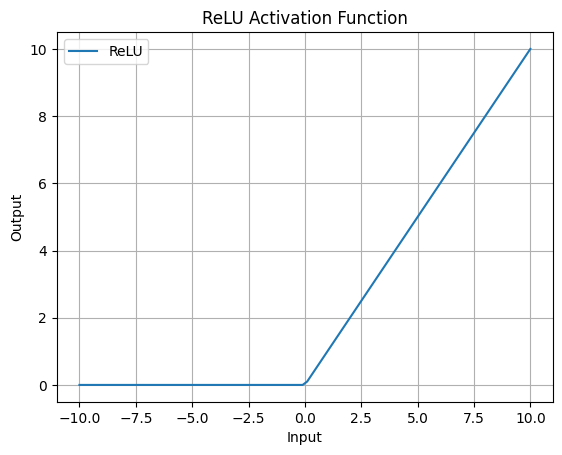

In [27]:
def relu(x):
    return np.maximum(0, x)

x = np.linspace(-10, 10, 100)
y = relu(x)

plt.plot(x, y, label="ReLU")
plt.title("ReLU Activation Function")
plt.xlabel("Input")
plt.ylabel("Output")
plt.grid(True)
plt.legend()
plt.show()

#### <span style="color:#AE445A; font-weight: bold;">Creating Dataset</span>

<p style="text-align: justify; 
          text-justify: inter-word;
          font-size:17px;">
    In this section, we are going to create synthetic data.
</p>

In [1]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import when, col
import requests

In [2]:
spark = SparkSession.builder.appName("Iris_Dataset").getOrCreate()
spark

In [3]:
# NOTE: Run this cell if you don't iris_data.csv file on your local
# URL of the Iris dataset
# url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# response = requests.get(url)
# with open("iris_data.csv", "wb") as file:
#     file.write(response.content)

200

In [3]:
iris_df = spark.read.csv("iris_data.csv", header=False, inferSchema=True)
column_names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"]
iris_df = iris_df.toDF(*column_names)

In [4]:
iris_df.show(5)

+------------+-----------+------------+-----------+-----------+
|sepal_length|sepal_width|petal_length|petal_width|    species|
+------------+-----------+------------+-----------+-----------+
|         5.1|        3.5|         1.4|        0.2|Iris-setosa|
|         4.9|        3.0|         1.4|        0.2|Iris-setosa|
|         4.7|        3.2|         1.3|        0.2|Iris-setosa|
|         4.6|        3.1|         1.5|        0.2|Iris-setosa|
|         5.0|        3.6|         1.4|        0.2|Iris-setosa|
+------------+-----------+------------+-----------+-----------+
only showing top 5 rows



In [5]:
iris_df = iris_df.withColumn(
    "species_encoding",
    when(col("species") == "Iris-setosa", 0)
    .when(col("species") == "Iris-virginica", 1)
    .when(col("species") == "Iris-versicolor", 2),
)

In [6]:
iris_df.sample(fraction=0.1, seed=0.211).show(12)

+------------+-----------+------------+-----------+---------------+----------------+
|sepal_length|sepal_width|petal_length|petal_width|        species|species_encoding|
+------------+-----------+------------+-----------+---------------+----------------+
|         4.7|        3.2|         1.3|        0.2|    Iris-setosa|               0|
|         4.9|        3.1|         1.5|        0.1|    Iris-setosa|               0|
|         5.4|        3.9|         1.3|        0.4|    Iris-setosa|               0|
|         5.0|        3.4|         1.6|        0.4|    Iris-setosa|               0|
|         5.1|        3.8|         1.6|        0.2|    Iris-setosa|               0|
|         4.9|        2.4|         3.3|        1.0|Iris-versicolor|               2|
|         6.6|        2.9|         4.6|        1.3|Iris-versicolor|               2|
|         5.6|        3.0|         4.5|        1.5|Iris-versicolor|               2|
|         5.7|        2.6|         3.5|        1.0|Iris-versicolo

#### <span style="color:#AE445A; font-weight: bold;">Implementing ReLU</span>

In [7]:
import numpy as np

X = iris_df.select(iris_df.columns[0:4])
y = iris_df.select(iris_df.species_encoding)

In [21]:
X_np = np.array(X.collect())
y_np = np.array(y.collect()).flatten()

In [22]:
print(f"Input shape: {X_np.shape}")
print(f"Output shape: {y_np.shape}")

Input shape: (150, 4)
Output shape: (150,)


In [33]:
class DenseLayer:
    def __init__(self, n_inputs, n_neurons, random_seed=42):
        """
        :param n_inputs: Input size or num of features, in our example, we have 4 features
        :type  n_inputs: int
        :param n_neurons: Number of neurons in the output layer
        :type  n_neurons: int
        """
        # By passing input and neurons to create random weights, you can avoid the problem of transposing weights
        np.random.seed(random_seed)
        self.weights = np.random.randn(n_inputs, n_neurons)
        self.bias = np.zeros((1, n_neurons))
    
    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.bias

class ActivationReLU:
    def forward(self, inputs):
        self.output = np.maximum(0, inputs)

In [34]:
layer1 = DenseLayer(n_inputs=4, n_neurons=5)
activation1 = ActivationReLU()
layer1.forward(X_np)

In [36]:
activation1.forward(layer1.output)

### <span style="color:#123524; font-weight: bold;">Softmax</span>